    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per \$10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's
 
### Lab Assignment 1
Perform the following activities:
* Download the HousePrice.csv [here](https://www.kaggle.com/vikrishnan/boston-house-prices) and visualize it using Matploitlib or any other plotting library. Hint: Choose any one or two attribute with respect to price to visualize and further processing of data for easiness)
* Implement the linear regression Algorithm:
```
Loop{
	For i=1 to m{
		ϴj+1=ϴj+α(yi-h(xi)).xj
}
}
```
This is a stochastic update rule for LMS
3. Try to normalize the data in between [0-1] using min-max normalization and use this normalized data in above algorithm and analyze the output. Hint
4. Implement the Logistic Regression and list the coefficient ϴ0, ϴ1 and ϴ2 for the dataset- LogisticDataset.csv.
5. Modify the code for question 4 so that it could behave as perceptron learning algorithm. Predict the value of y for X=(5.8097,2.4711).

In [5]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

data = pd.read_csv('housing.csv',
                   sep=" ",header=None,
                skipinitialspace=True,
                quoting=csv.QUOTE_ALL)
data = pd.DataFrame(data).rename(columns={0:"CRIM",1:"ZN",2:"INDUS",3:"CHAS",4:"NOX",5:"RM",6:"AGE",7:"DIS",
                                          8:"RAD",9:"TAX",10:"PTRATIO",11:"B",12:"LSTAT",13:"MEDV"})
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Q.1 visualize it using Matploitlib or any other plotting library.

-> Let's check the correlation to filter out unrelated data

In [2]:
Correlation  = data.corr()
Correlation['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Here RM and LSTAT has highest value of correlation in positive and negative way. so we are choosing RM and LSTAT with MEDV

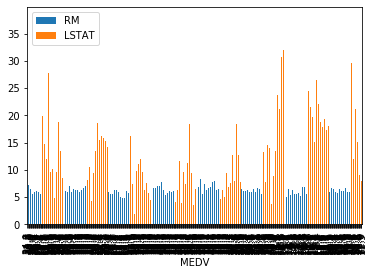

In [3]:
data.plot(x="MEDV", y=["RM", "LSTAT"], kind="bar")

Text(0.5, 0, 'MEDV')

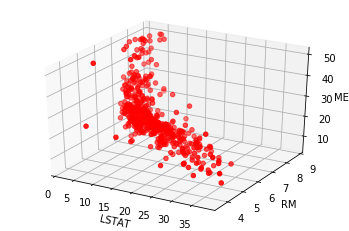

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['LSTAT'],data['RM'],data['MEDV'],c='r')
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

Q.2 Implement Linear regression

In [39]:
# Prepare Data
X1 = data['RM'].values
X2 = data['LSTAT'].values
X=np.array([np.ones(len(X1)), X1, X2])
B = np.zeros(3)
Y = np.array(data['MEDV'].values)
alpha = 0.0001

[[1.    1.    1.    ... 1.    1.    1.   ]
 [6.575 6.421 7.185 ... 6.976 6.794 6.03 ]
 [4.98  9.14  4.03  ... 5.64  6.48  7.88 ]]


In [31]:
# Define Cost function
def costFunction(X, Y, B):
    return np.sum((X.T.dot(B) - Y) ** 2)/(2 * len(Y))


In [40]:
def train(X,Y,B):
    cost_iter = []
    for i in range(1000):
        # Prediction
        prediction = X.T.dot(B)
        # Error 
        error = prediction - Y
        # Gradient
        gradient = X.dot(error) / len(Y)
        # update B
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost_iter.append(costFunction(X, Y, B))
    return B, cost_iter

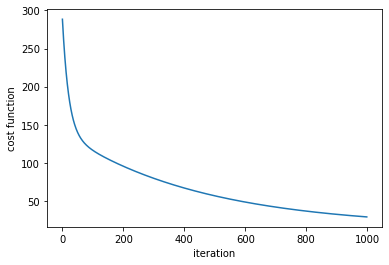

In [38]:
nB, cost_history = train(X, Y, B)
plt.plot(cost_history)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.show()